In [1]:
import os
import sys
import glob
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="ticks")

In [2]:
srs_50k = pd.read_csv("50k_srs_songs.csv")
pop_70k = pd.read_csv("top70ksongs.csv")

## Description of Data for Songs

From the spotify API, we were able to get the following audio features for each track. Below, we have listed them with a description of what they represent:

* **DANCEABILITY:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **ENERGY:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* **KEY:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **LOUDNESS:** The overall loudness of a track in decibels (dB) ranging from -60 to 0. Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
* **MODE:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **SPEECHINESS:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
* **ACOUSTICNESS:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
* **INSTRUMENTALNESS:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
* **LIVENESS:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. Values range from 0 to 1 with a value above 0.8 providing strong likelihood that the track is live. 
* **VALENCE:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **TEMPO:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## EDA Thought Process and Results

For part of our EDA, we decided it would be a good idea to look at the songs within the playlists. We derived two subsets of songs from the playlists with the audio features described above:
* One random subset of 50,000 songs
* The most popular 70,000 songs (as measured by frequency of apperance in playlists)

We wanted to compare the audio features within these two subsets to compare whether or not a simple random sample of songs would have significantly different features from a subset of the most popular songs.

We did this in two ways: using summary statistics and comparing distributions.

## Comparing Summary Statistics

In [50]:
srs_50k.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,4.999600e+04,49996.000000
mean,0.550618,0.585032,5.269422,-9.655672,0.654912,0.090006,0.354872,0.220637,0.208626,0.476369,120.128909,2.478844e+05,3.880330
std,0.184363,0.266107,3.565643,5.621092,0.475402,0.116390,0.354657,0.349503,0.188922,0.269302,29.914074,1.605099e+05,0.474176
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.229000e+03,0.000000
25%,0.427000,0.391000,2.000000,-11.915250,0.000000,0.035400,0.022100,0.000000,0.096000,0.250000,97.020250,1.842552e+05,4.000000
50%,0.567000,0.623000,5.000000,-8.161000,1.000000,0.047200,0.218000,0.000600,0.128000,0.467000,120.019000,2.251600e+05,4.000000
75%,0.688000,0.808000,8.000000,-5.821750,1.000000,0.084400,0.692000,0.421000,0.261000,0.695000,138.285000,2.782010e+05,4.000000
max,0.987000,1.000000,11.000000,4.472000,1.000000,0.964000,0.996000,1.000000,1.000000,1.000000,248.733000,5.823661e+06,5.000000


In [49]:
pop_70k.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,6.967800e+04,69678.000000
mean,0.585016,0.641262,5.241152,-7.476997,0.667671,0.088783,0.250946,0.071644,0.193273,0.478198,121.537697,2.347612e+05,3.931270
std,0.163043,0.221970,3.589362,3.865238,0.471052,0.095779,0.290335,0.208811,0.159902,0.244579,28.999635,6.936283e+04,0.352175
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.520000e+03,0.000000
25%,0.478000,0.493000,2.000000,-9.070000,0.000000,0.034800,0.018400,0.000000,0.096000,0.282000,98.416500,1.965600e+05,4.000000
50%,0.594000,0.674000,5.000000,-6.612000,1.000000,0.048100,0.116000,0.000009,0.127000,0.466000,120.732500,2.250795e+05,4.000000
75%,0.703000,0.821000,8.000000,-4.928000,1.000000,0.093200,0.416000,0.002560,0.246000,0.669000,140.000000,2.611330e+05,4.000000
max,0.988000,0.999000,11.000000,1.586000,1.000000,0.962000,0.996000,0.994000,1.000000,0.992000,236.799000,4.195000e+06,5.000000


From the summary statistics, we see that the means and standard deviations for most of the features are similar with a few exceptions. Energy has a greater mean in the popular song subset. Loudness, acousticness, instrumentalness, and duration_ms have smaller means and smaller variances in the subset of popular songs. 

However, we cannot simply rely on summary statistics to tell us everything about the data. Therefore, we will graph the distributions of the data and compare them as well.

## Comparing Distributions

In [46]:
col_of_interest = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "valence", "tempo", "duration_ms"]

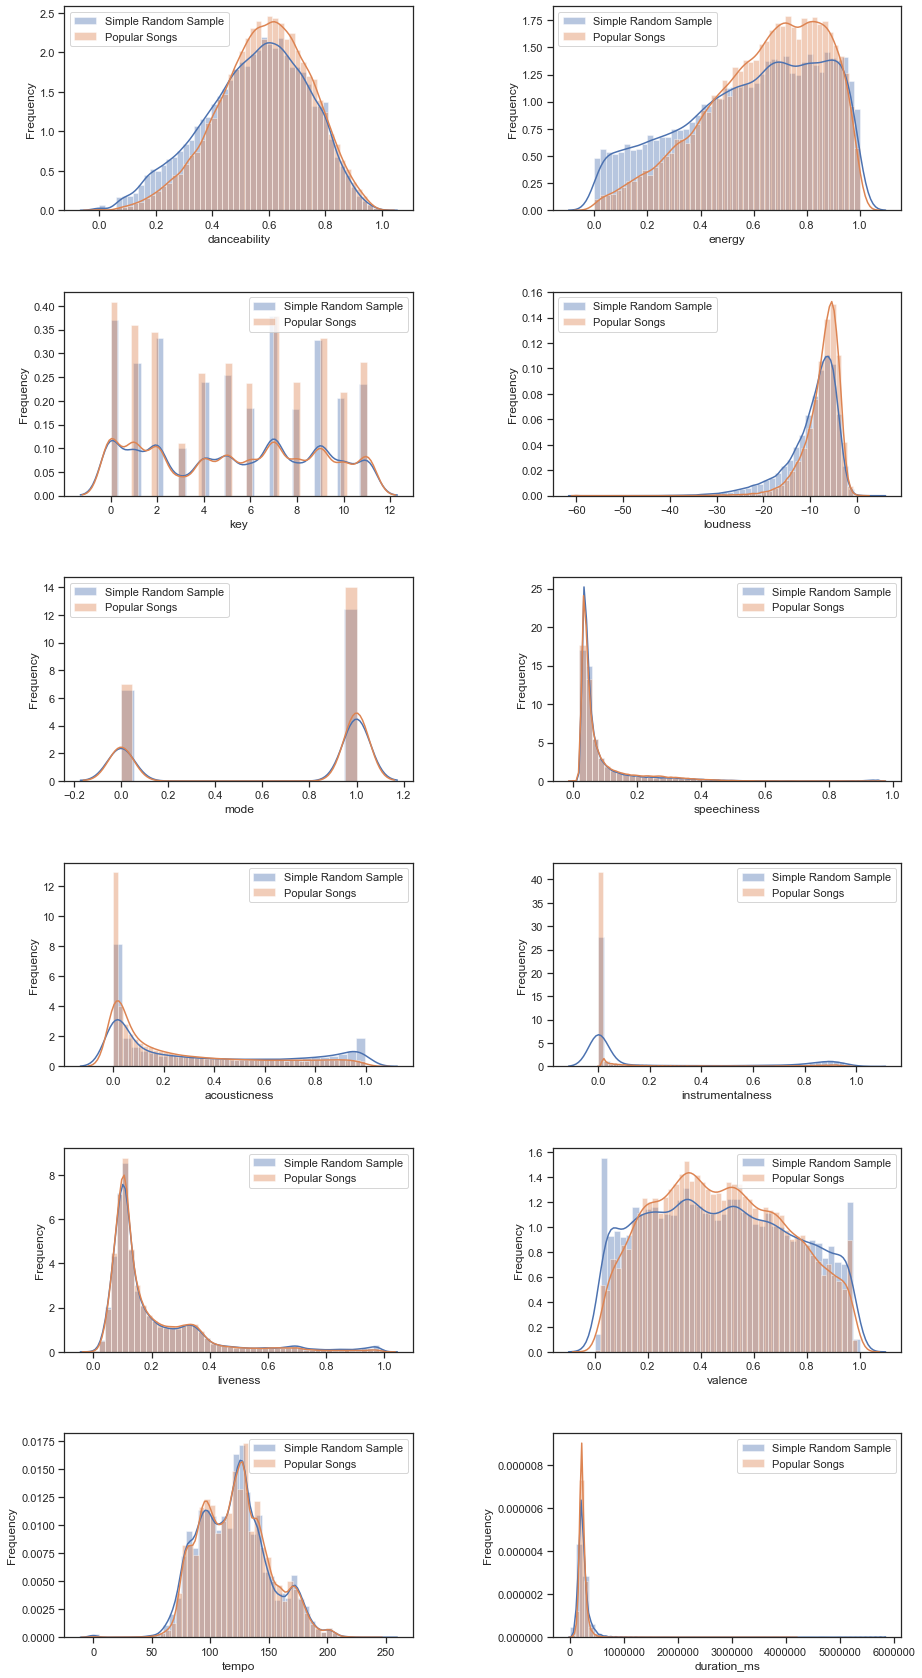

In [48]:
fig, ax = plt.subplots(6,2, figsize = (15,30))
fig.subplots_adjust(hspace=.4, wspace=.4)
axes = ax.ravel()

for i in range(len(col_of_interest)):
    sns.distplot(srs_50k[col_of_interest[i]], ax = axes[i], kde = True, label = "Simple Random Sample")
    sns.distplot(pop_70k[col_of_interest[i]], ax = axes[i], kde = True, label = "Popular Songs")
    axes[i].legend()
    axes[i].set_xlabel(col_of_interest[i])
    axes[i].set_ylabel("Frequency")

We wanted to check the distribution of audio features in both of these subsets and compare them to see whether or not the distributions of the random subset would be different from the distribution of the most popular songs of the playlists we have. 

From the plots above, we see that most of the distributions are not very different. The ones that we identified that are potentially different are: loudness, acousticness, energy, duration_ms, and instrumentalness. 

* In the "loudness" plot, we see greater concentration of values around 0 for the popular songs, potentially suggesting that more popular songs are louder.

* In the "acousticness" plot, we see a stronger drop off of values from 0 to 1, suggesting that the distribution of the more popular songs have less acoustic songs.

* In the "instrumentalness" plot, we see a similar steeper drop off of values from 0 to 1, suggesting that the distribution of the more popular songs have less instrumental songs as well.

* In the "energy" plot, we see that there is a greater concentration of larger values in the popular songs distribution. This suggests that more popular songs have greater energy. 

* In the "duration_ms" plot, though it hard to see, there is larger spike in smaller values for the popular songs distribution. This suggests that more popular songs are shorter in duration.

More generally, we see that the audio features have different distributions of values. We have a mix of left-skewed (energy, loudness), right-skewed (liveness, instrumentalness, acousticness, speechiness, duration_ms) and normal (danceability, tempo, valence) data. 